# Illustrating a few types of Classification
* Logistic Regression
* K-Nearest Neighbors
* Decision Trees

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import plotly.graph_objects as go

import sklearn.datasets
import sklearn.cluster
import sklearn.linear_model
import sklearn.neighbors
import sklearn.tree

## Make some data

This will make 3 clusters of points in a 2D space, with y being a label of 0, 1, or 2.

In [15]:
x, y = sklearn.datasets.make_blobs(n_samples=300, centers=3, cluster_std=1.00, random_state=0)

## Supervised: Classification

For supervised learning, we'll assume that we do know what the labels are.
* Include `y`

We will train a classification algorithm called Logistic Regression.

In [16]:
# Choose the model

model = sklearn.linear_model.LogisticRegression()
# model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 1)
# model = sklearn.tree.DecisionTreeClassifier(max_depth=4)

In [17]:
# Train the model

model.fit(x, y)

LogisticRegression()

The model training "learns" the optimum parameters of the logistic equation to establish classification boundaries in the $(x_0, x_1)$ space.

In [18]:
model.intercept_

array([-4.22131738,  3.25150001,  0.96981736])

In [19]:
model.coef_

array([[ 0.85757709,  1.56604304],
       [ 1.17805347, -1.50751785],
       [-2.03563057, -0.05852518]])

In order to look at the predictions:
* Make a 2D grid of points
* Plot the predicted values for each point of the grid
* Plot the actual x and y data as scatter points on top of that

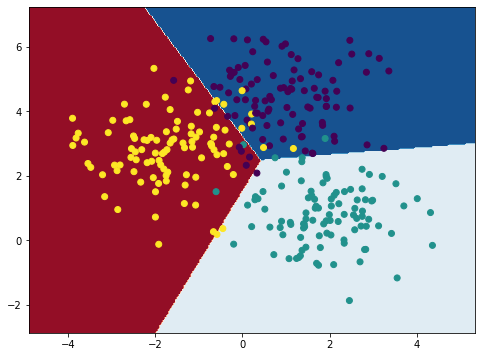

In [20]:
dx = 0.04
dy = 0.04
x_min = x[:, 0].min() - 1
x_max = x[:, 0].max() + 1
y_min = x[:, 1].min() - 1
y_max = x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                      np.arange(y_min, y_max, dy))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="RdBu_r")

plt.scatter(x[:,0], x[:,1], c = y)

In [21]:
y_pred = model.predict(x)

In [22]:
print(sklearn.metrics.confusion_matrix(y, y_pred))

[[93  1  6]
 [ 2 96  2]
 [ 8  2 90]]


In [23]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y, y_pred, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y, y_pred, average='micro'):.2%}")

Accuracy: 93.00%
Precision: 93.00%
Recall: 93.00%


## Tree model representations

In [24]:
text_representation = sklearn.tree.export_text(model)
print(text_representation)

AttributeError: 'LogisticRegression' object has no attribute 'tree_'

AttributeError: 'LogisticRegression' object has no attribute 'tree_'

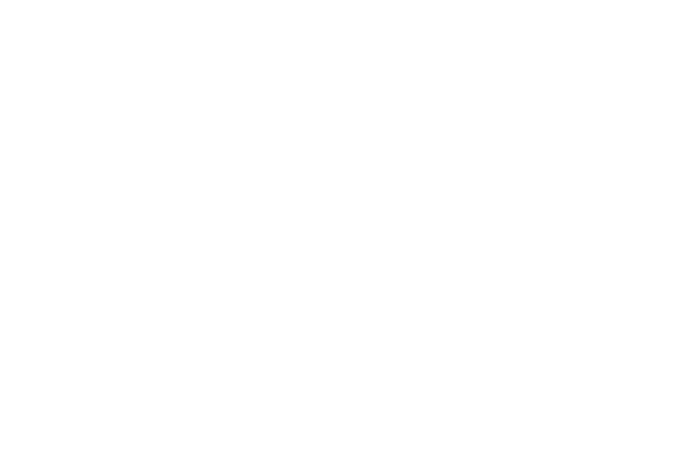

In [25]:
plt.figure(figsize=(12,8))
sklearn.tree.plot_tree(model, 
               feature_names=['x0', 'x1'],  
               class_names=['blob1', 'blob2', 'blob3'],
               filled=True);

In [26]:
import dtreeviz.trees

ModuleNotFoundError: No module named 'dtreeviz'

In [27]:
dtreeviz.trees.dtreeviz(model,
                        x,
                        y,
                        feature_names=['x0', 'x1'],
                        class_names=['blob1', 'blob2', 'blob3'])

NameError: name 'dtreeviz' is not defined